In [1]:
import scipy.special as SSp
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import scipy.ndimage
from scipy import fftpack
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
def gaussianizepdf(denf,avgrepeats=True, sigmagauss = None,assumelognormal=True):
    denshape = denf.shape
    denff = denf.flatten()
    o_f = np.argsort(denff)
    gaussf = 0.*denff.astype(np.float)
    lenny = len(gaussf)

    if (sigmagauss == None):
        if assumelognormal:
            sigmagauss = np.sqrt(np.log1p(np.var(denff)))
        else:
            sigmagauss = np.std(denff)
    print(sigmagauss)

    step = 1./lenny

    gaussf[o_f] = np.sqrt(2.)*sigmagauss*SSp.erfinv(2.*np.arange(0.5*step,1,step)-1.)

    # average together repeated elements
    if (avgrepeats):
        cuts = np.searchsorted(denff[o_f],np.unique(denff[o_f]))
        print(len(cuts),'cuts')
        for i in range(len(cuts)-1):
            gaussf[o_f[cuts[i]:cuts[i+1]]] = np.mean(gaussf[o_f[cuts[i]:cuts[i+1]]])
        # get the last one
        gaussf[o_f[cuts[-1]:]]=np.mean(gaussf[o_f[cuts[-1]:]])

    gaussf = gaussf.reshape(denshape)

    return gaussf

In [3]:
image_data = fits.open('file:///C:/cygwin64/home/rehg98/WLconv_z1100.00_0580r.fits')[0].data.astype(float)
noisy_data = np.load('C:/cygwin64/home/rehg98/recon_Om0.296_Ol0.704_w-1.000_si0.786_r0580.npy')
noisy_smooth = scipy.ndimage.filters.gaussian_filter(noisy_data, 2.995) #0.88 pixels for 5 arcmin; 2.995 for 17 arcmin
noisyf_data = np.load('C:/cygwin64/home/rehg98/recon_filtered_Om0.296_Ol0.704_w-1.000_si0.786_r0580.npy')

In [4]:
image_data_1 = scipy.ndimage.filters.gaussian_filter(image_data, 9.75)
image_data_2 = scipy.ndimage.filters.gaussian_filter(image_data, 19.5)
image_data_5 = scipy.ndimage.filters.gaussian_filter(image_data, 48.76)
image_data_10 = scipy.ndimage.filters.gaussian_filter(image_data, 97.5)

In [18]:
gauss_data_1 = gaussianizepdf(image_data_1)
#gauss_data_2 = gaussianizepdf(image_data_2)
#gauss_data_5 = gaussianizepdf(image_data_5)
#gauss_data_10 = gaussianizepdf(image_data_10)

gauss_noisy_data = gaussianizepdf(noisy_data)

#gauss_noisyf_data = gaussianizepdf(noisyf_data)

0.0625684912735
4194304 cuts
0.373086818048
5929 cuts


In [39]:
gauss_noisysmooth_data = gaussianizepdf(noisy_smooth)

0.0338625369568
5929 cuts


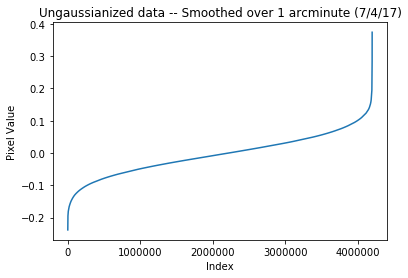

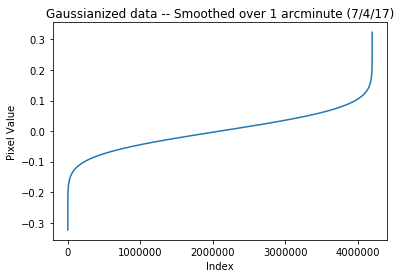

In [6]:
plt.plot(np.sort(image_data_1.flatten()))
plt.title('Ungaussianized data -- Smoothed over 1 arcminute (7/4/17)')
plt.xlabel("Index")
plt.ylabel("Pixel Value")
plt.show()

plt.plot(np.sort(gauss_data_1.flatten()))  
plt.title('Gaussianized data -- Smoothed over 1 arcminute (7/4/17)')
plt.xlabel("Index")
plt.ylabel("Pixel Value")
plt.show()

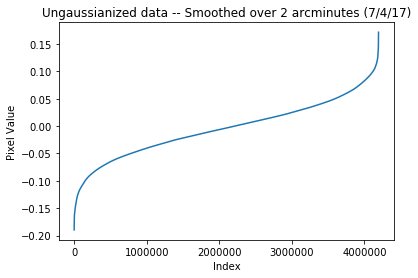

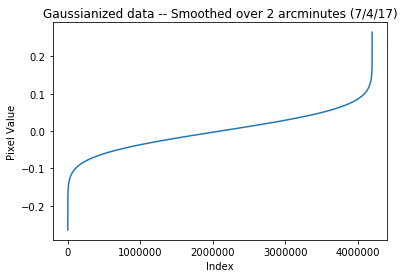

In [7]:
plt.plot(np.sort(image_data_2.flatten()))
plt.title('Ungaussianized data -- Smoothed over 2 arcminutes (7/4/17)')
plt.xlabel("Index")
plt.ylabel("Pixel Value")
plt.show()

plt.plot(np.sort(gauss_data_2.flatten()))  
plt.title('Gaussianized data -- Smoothed over 2 arcminutes (7/4/17)')
plt.xlabel("Index")
plt.ylabel("Pixel Value")
plt.show()

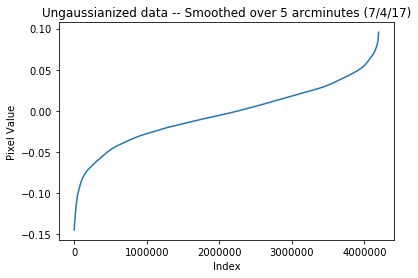

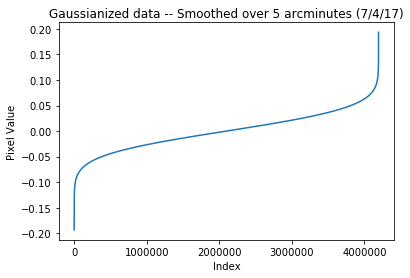

In [8]:
plt.plot(np.sort(image_data_5.flatten()))
plt.title('Ungaussianized data -- Smoothed over 5 arcminutes (7/4/17)')
plt.xlabel("Index")
plt.ylabel("Pixel Value")
plt.show()

plt.plot(np.sort(gauss_data_5.flatten()))  
plt.title('Gaussianized data -- Smoothed over 5 arcminutes (7/4/17)')
plt.xlabel("Index")
plt.ylabel("Pixel Value")
plt.show()

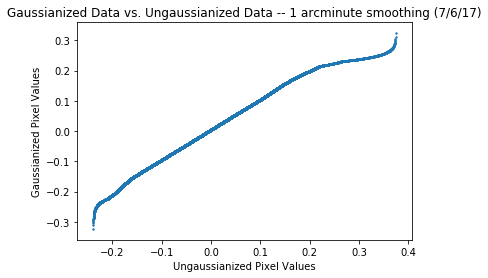

In [9]:
plt.scatter(image_data_1.flatten(), gauss_data_1.flatten(), s=2)
plt.title("Gaussianized Data vs. Ungaussianized Data -- 1 arcminute smoothing (7/6/17)")
plt.xlabel("Ungaussianized Pixel Values")
plt.ylabel("Gaussianized Pixel Values")
plt.show()

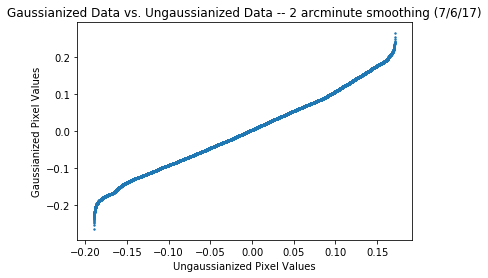

In [10]:
plt.scatter(image_data_2.flatten(), gauss_data_2.flatten(), s=2)
plt.title("Gaussianized Data vs. Ungaussianized Data -- 2 arcminute smoothing (7/6/17)")
plt.xlabel("Ungaussianized Pixel Values")
plt.ylabel("Gaussianized Pixel Values")
plt.show()

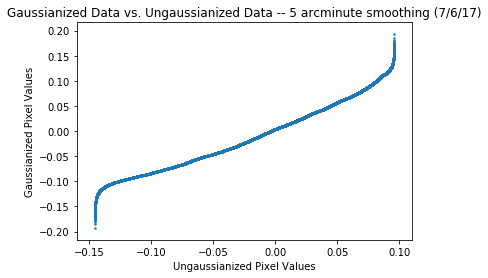

In [11]:
plt.scatter(image_data_5.flatten(), gauss_data_5.flatten(), s=2)
plt.title("Gaussianized Data vs. Ungaussianized Data -- 5 arcminute smoothing (7/6/17)")
plt.xlabel("Ungaussianized Pixel Values")
plt.ylabel("Gaussianized Pixel Values")
plt.show()

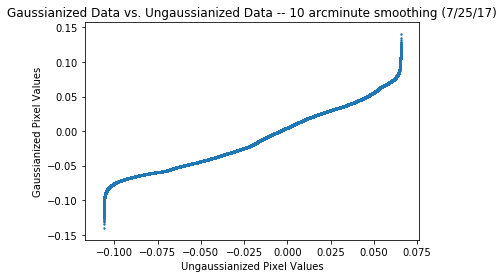

In [12]:
plt.scatter(image_data_10.flatten(), gauss_data_10.flatten(), s=2)
plt.title("Gaussianized Data vs. Ungaussianized Data -- 10 arcminute smoothing (7/25/17)")
plt.xlabel("Ungaussianized Pixel Values")
plt.ylabel("Gaussianized Pixel Values")
plt.show()

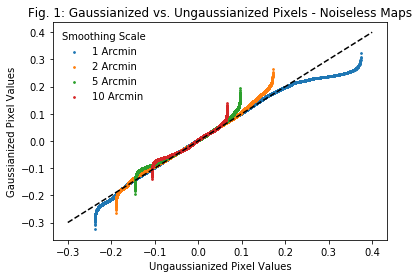

In [13]:
plt.figure()
plt.scatter(image_data_1.flatten(), gauss_data_1.flatten(), s=3, label = "1 Arcmin")
plt.scatter(image_data_2.flatten(), gauss_data_2.flatten(), s=3, label = "2 Arcmin")
plt.scatter(image_data_5.flatten(), gauss_data_5.flatten(), s=3, label = "5 Arcmin")
plt.scatter(image_data_10.flatten(), gauss_data_10.flatten(), s=3, label = "10 Arcmin")
plt.plot([-0.3, 0.4], [-0.3, 0.4], "k--")

plt.title("Fig. 1: Gaussianized vs. Ungaussianized Pixels - Noiseless Maps")
plt.xlabel("Ungaussianized Pixel Values")
plt.ylabel("Gaussianized Pixel Values")
plt.legend(frameon = 0, fontsize = 10, title = "Smoothing Scale")
plt.show()

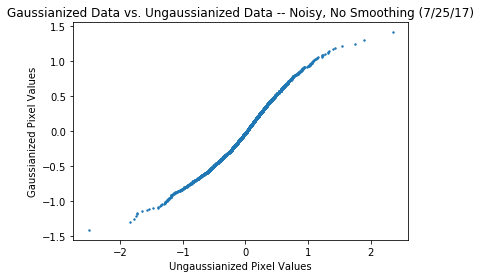

In [14]:
plt.scatter(noisy_data.flatten(), gauss_noisy_data.flatten(), s=2)
plt.title("Gaussianized Data vs. Ungaussianized Data -- Noisy, No Smoothing (7/25/17)")
plt.xlabel("Ungaussianized Pixel Values")
plt.ylabel("Gaussianized Pixel Values")
plt.show()

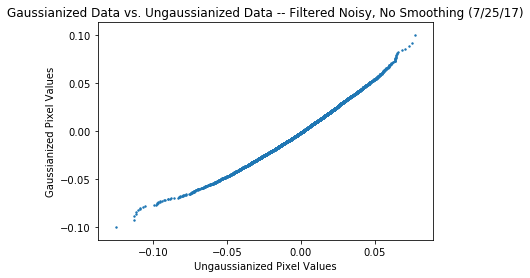

In [15]:
plt.scatter(noisyf_data.flatten(), gauss_noisyf_data.flatten(), s=2)
plt.title("Gaussianized Data vs. Ungaussianized Data -- Filtered Noisy, No Smoothing (7/25/17)")
plt.xlabel("Ungaussianized Pixel Values")
plt.ylabel("Gaussianized Pixel Values")
plt.show()

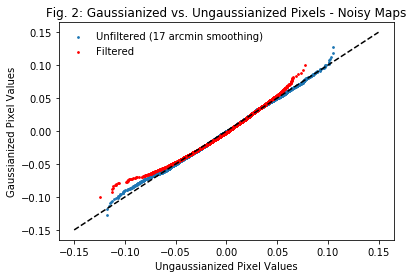

In [40]:
plt.scatter(noisy_smooth.flatten(), gauss_noisysmooth_data.flatten(), s=3, label = "Unfiltered (17 arcmin smoothing)")
plt.scatter(noisyf_data.flatten(), gauss_noisyf_data.flatten(), s=3, label = "Filtered", c='r')
plt.plot([-0.15, 0.15], [-0.15, 0.15], 'k--')
plt.title("Fig. 2: Gaussianized vs. Ungaussianized Pixels - Noisy Maps")
plt.xlabel("Ungaussianized Pixel Values")
plt.ylabel("Gaussianized Pixel Values")
plt.legend(frameon = 0, fontsize = 10)
plt.show()

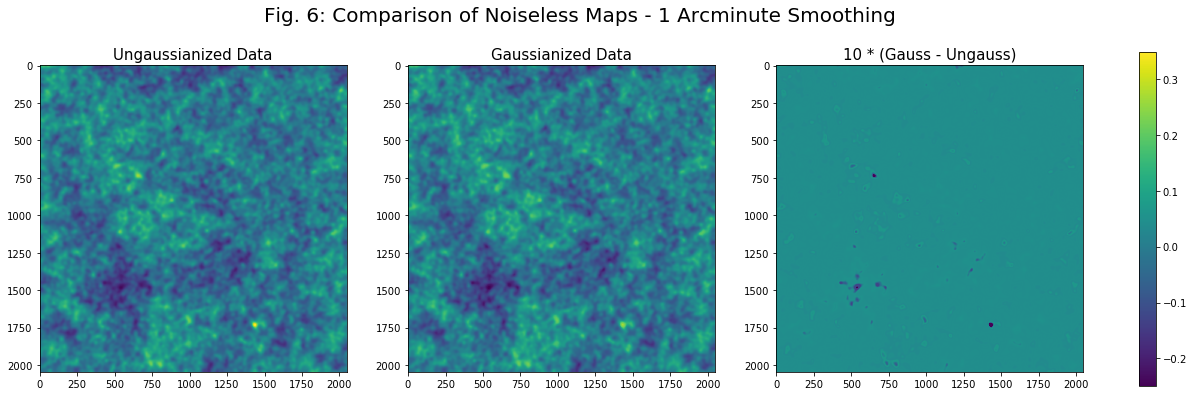

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize = (20, 20))
axlist = [ax1, ax2, ax3]

fig.suptitle("Fig. 6: Comparison of Noiseless Maps - 1 Arcminute Smoothing", y = 0.65, fontsize = "20")
#plt.subplot(1, 3, 1)
first = ax1.imshow(image_data_1, vmin = -0.25, vmax = 0.35)
ax1.set_title('Ungaussianized Data', fontsize = "15")


#plt.subplot(1, 3, 2)
#plt.figure(figsize = (2, 2))
ax2.imshow(gauss_data_1, vmin = -0.25, vmax = 0.35)
ax2.set_title('Gaussianized Data', fontsize = "15")


#plt.subplot(1, 3, 3)
#plt.figure(figsize = (2, 2))
ax3.imshow(10 * (gauss_data_1 - image_data_1), vmin = -0.25, vmax = 0.35)
ax3.set_title('10 * (Gauss - Ungauss)', fontsize = "15")

fig.colorbar(first, ax=axlist, fraction=0.015)

#plt.subplots_adjust(wspace=1)
#plt.tight_layout()
plt.show()

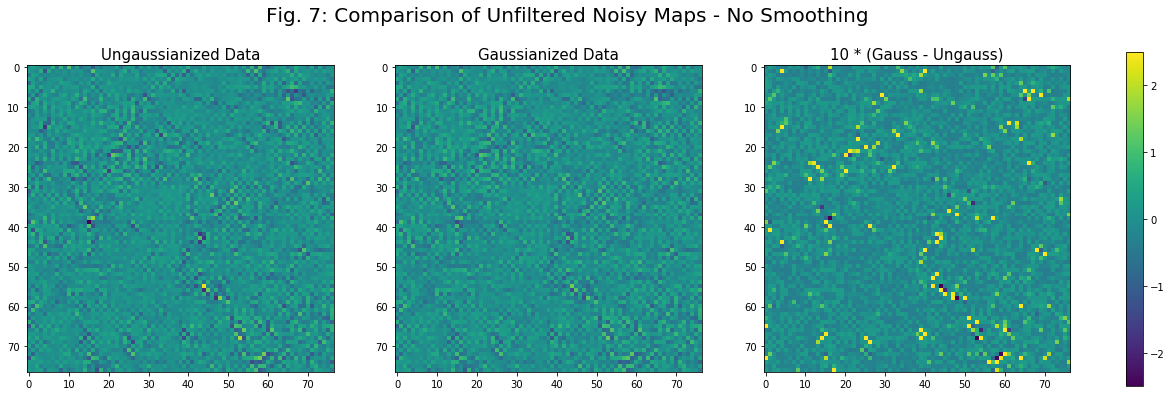

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize = (20, 20))
axlist = [ax1, ax2, ax3]

fig.suptitle("Fig. 7: Comparison of Unfiltered Noisy Maps - No Smoothing", y = 0.65, fontsize = "20")
first = ax1.imshow(noisy_data, vmin = -2.5, vmax = 2.5)
ax1.set_title('Ungaussianized Data', fontsize = "15")

ax2.imshow(gauss_noisy_data, vmin = -2.5, vmax = 2.5)
ax2.set_title('Gaussianized Data', fontsize = "15")

ax3.imshow(10 * (gauss_noisy_data - noisy_data), vmin = -2.5, vmax = 2.5)
ax3.set_title('10 * (Gauss - Ungauss)', fontsize = "15")

fig.colorbar(first, ax=axlist, fraction=0.015)
plt.show()

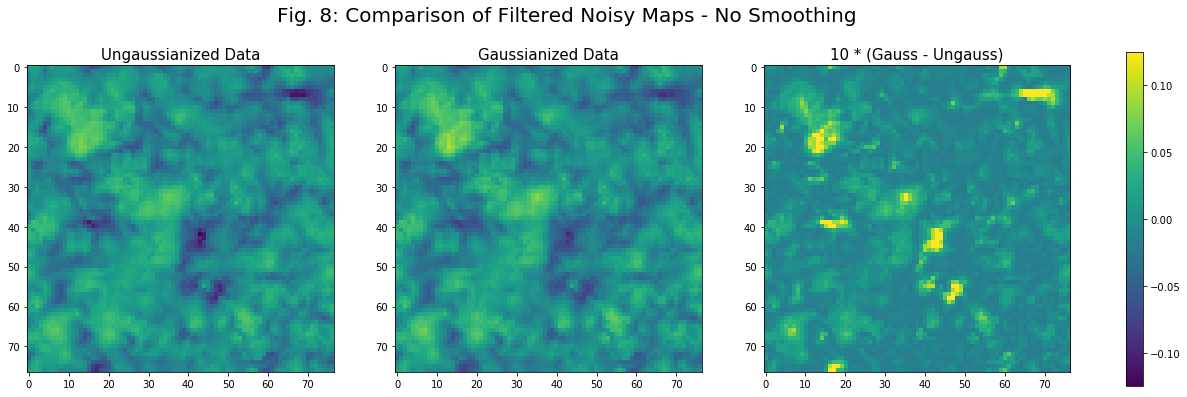

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize = (20, 20))
axlist = [ax1, ax2, ax3]

fig.suptitle("Fig. 8: Comparison of Filtered Noisy Maps - No Smoothing", y = 0.65, fontsize = "20")
first = ax1.imshow(noisyf_data, vmin = -0.125, vmax = 0.125)
ax1.set_title('Ungaussianized Data', fontsize = "15")

ax2.imshow(gauss_noisyf_data, vmin = -0.125, vmax = 0.125)
ax2.set_title('Gaussianized Data', fontsize = "15")

ax3.imshow(10 * (gauss_noisyf_data - noisyf_data), vmin = -0.125, vmax = 0.125)
ax3.set_title('10 * (Gauss - Ungauss)', fontsize = "15")

fig.colorbar(first, ax=axlist, fraction=0.015)
plt.show()

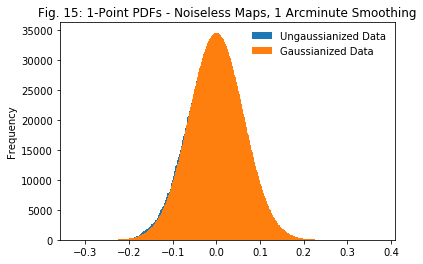

In [43]:
NBINS = 500
plt.hist(image_data_1.flatten(), NBINS, label = "Ungaussianized Data")
plt.hist(gauss_data_1.flatten(), NBINS, label = "Gaussianized Data")
plt.title("Fig. 15: 1-Point PDFs - Noiseless Maps, 1 Arcminute Smoothing")
#plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.legend(frameon = 0, fontsize = 10)
plt.show()

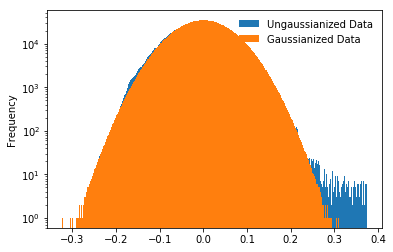

In [17]:
NBINS = 500
plt.hist(image_data_1.flatten(), NBINS, label = "Ungaussianized Data")
plt.hist(gauss_data_1.flatten(), NBINS, label = "Gaussianized Data")
#plt.title("Fig. 15: 1-Point PDFs - Noiseless Maps, 1 Arcminute Smoothing")
#plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.yscale('log', nonposy = 'clip')
plt.legend(frameon = 0, fontsize = 10)
plt.show()

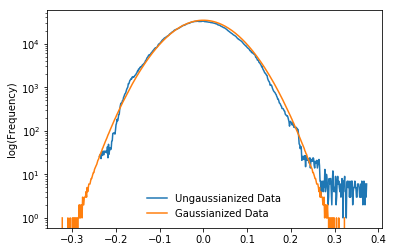

In [22]:
NBINS = 500

y1, binEdges1 = np.histogram(image_data_1.flatten(), NBINS)
bincenters1 = 0.5*(binEdges1[1:]+binEdges1[:-1])
plt.plot(bincenters1, y1,'-', label = "Ungaussianized Data")

y2, binEdges2 = np.histogram(gauss_data_1.flatten(), NBINS)
bincenters2 = 0.5*(binEdges2[1:]+binEdges2[:-1])
plt.plot(bincenters2, y2,'-', label = "Gaussianized Data")

#plt.title("Fig. 15: 1-Point PDFs - Noiseless Maps, 1 Arcminute Smoothing")
#plt.xlabel("Bins")
plt.ylabel("log(Frequency)")
plt.yscale('log', nonposy = 'clip')
plt.legend(frameon = 0, fontsize = 10)
plt.show()

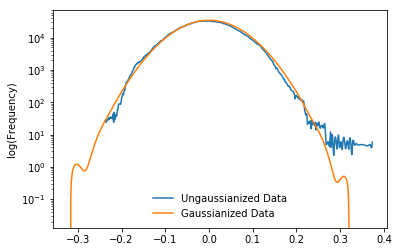

In [21]:
from scipy.interpolate import UnivariateSpline
NBINS = 500

p1, x1 = np.histogram(image_data_1.flatten(), NBINS)
x1 = x1[:-1] + (x1[1] - x1[0])/2   # convert bin edges to centers
f1 = UnivariateSpline(x1, p1, s=NBINS)
plt.plot(x1, f1(x1), label = "Ungaussianized Data")

p2, x2 = np.histogram(gauss_data_1.flatten(), NBINS)
x2 = x2[:-1] + (x2[1] - x2[0])/2   # convert bin edges to centers
f2 = UnivariateSpline(x2, p2, s=NBINS)
plt.plot(x2, f2(x2), label = "Gaussianized Data")

#plt.title("Fig. 15: 1-Point PDFs - Noiseless Maps, 1 Arcminute Smoothing")
#plt.xlabel("Bins")
plt.ylabel("log(Frequency)")
plt.yscale('log', nonposy = 'clip')
plt.legend(frameon = 0, fontsize = 10)
plt.show()

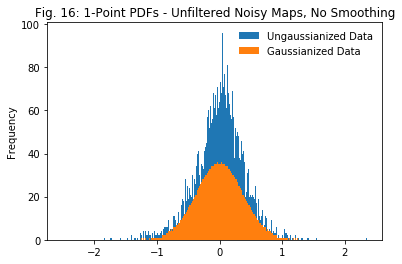

In [44]:
NBINS = 500
plt.hist(noisy_data.flatten(), NBINS, label = "Ungaussianized Data")
plt.hist(gauss_noisy_data.flatten(), NBINS, label = "Gaussianized Data")
plt.title("Fig. 16: 1-Point PDFs - Unfiltered Noisy Maps, No Smoothing")
#plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.legend(frameon = 0, fontsize = 10)
plt.show()

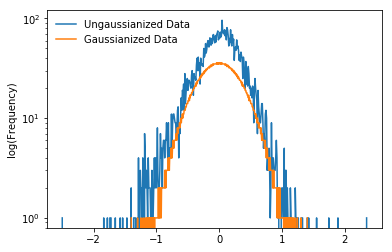

In [20]:
NBINS = 500

y1, binEdges1 = np.histogram(noisy_data.flatten(), NBINS)
bincenters1 = 0.5*(binEdges1[1:]+binEdges1[:-1])
plt.plot(bincenters1, y1,'-', label = "Ungaussianized Data")

y2, binEdges2 = np.histogram(gauss_noisy_data.flatten(), NBINS)
bincenters2 = 0.5*(binEdges2[1:]+binEdges2[:-1])
plt.plot(bincenters2, y2,'-', label = "Gaussianized Data")

#plt.title("Fig. 15: 1-Point PDFs - Noiseless Maps, 1 Arcminute Smoothing")
#plt.xlabel("Bins")
plt.ylabel("log(Frequency)")
plt.yscale('log', nonposy = 'clip')
plt.legend(frameon = 0, fontsize = 10)
plt.show()

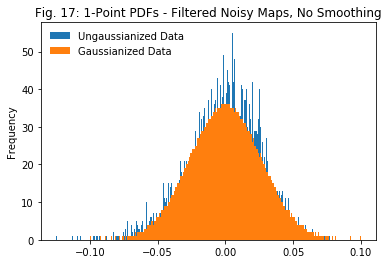

In [45]:
NBINS = 500
plt.hist(noisyf_data.flatten(), NBINS, label = "Ungaussianized Data")
plt.hist(gauss_noisyf_data.flatten(), NBINS, label = "Gaussianized Data")
plt.title("Fig. 17: 1-Point PDFs - Filtered Noisy Maps, No Smoothing")
#plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.legend(frameon = 0, fontsize = 10)
plt.show()